# 21M.387 Fundamentals of Music Processing
## Problem Set 3: Fourier Transforms

Make sure all your answers and plots display when the code block is run. You can leave word-based answers in code comments or markdown cells.

You may use any fmplib functions from __previous__ units in your answers. You may __not__ use any fmplib functions from the current unit in your answers (unless explicitly noted). But you can use the current unit's fmplib for testing your code.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from ipywidgets import interact
import sys
sys.path.append("..")
import fmplib as fmp

plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['image.interpolation'] = 'nearest'
fmp.documentation_button()

## Exercise 1

Consider this function:

$x(t) = A \cos(\omega t + \phi)$.  
with the parameters: $A=3$. $\omega=8 \pi$. $\phi= \pi / 4$.

Use numpy to create a signal $x_1[n]$ that is sampled from the first 4 seconds of $x(t)$ at a sampling rate of $F_s = 100$Hz.

Store your answer in the variable `x1`

In [2]:
# sinusoid params
A = 3
v = 8 * np.pi
ph = np.pi / 4

# sampling params
t = 4
fs = 100

def make_cosine(A, v, ph, t, fs):
    T = np.linspace(0, t, t*fs, endpoint=False)
    return A * np.cos(v*T + ph)

x1 = make_cosine(A, v, ph, t, fs)

Use `matplotlib` to make two plots of $x_1$.

In the first graph plot $x[n]$, where the x-axis shows the sample number $n$. Label the $x$ axis appropriately.  
In the second graph plot $x(t)$. The curve will look the same, but the $x$ axis should show time in seconds. Label the $x$ axis appropriately.

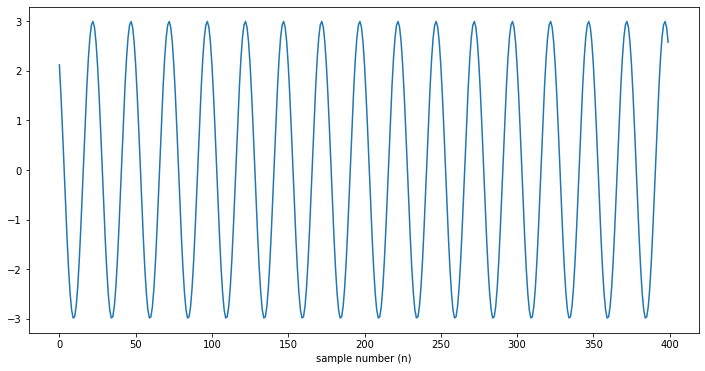

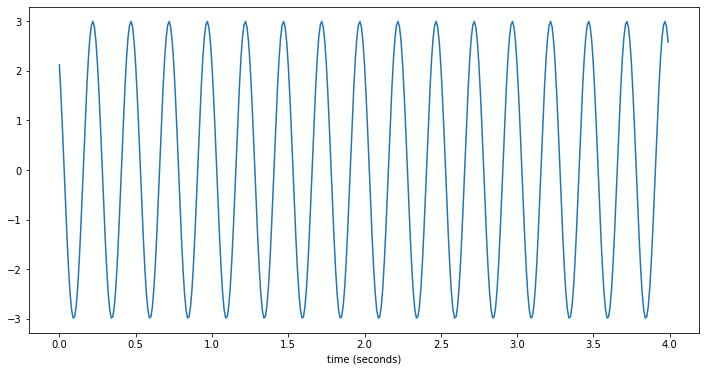

In [3]:
# make 2 plots
plt.plot(x1)
plt.xlabel('sample number (n)')
plt.show()

x_t = np.arange(t * fs) / fs
plt.plot(x_t, x1)
plt.xlabel('time (seconds)')
plt.show()

## Exercise 2

Use numpy's fft function (`np.fft.fft`) to create $X_1[k]$, the Discrete Fourier Transform of $x_1[n]$ from Exercise 1.

Make two plots of $X_1[k]$: the magnitude $\lvert X_1[k] \lvert$ and the phase $\angle X_1[k]$. For the phase plot to look good, set its values to zero for all points where the magnitude of $X_1[k]$ is negligible.


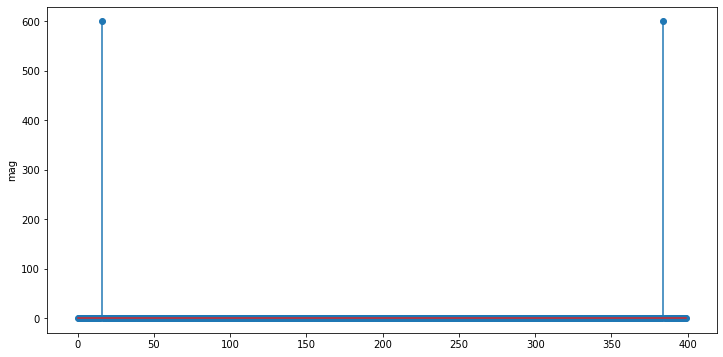

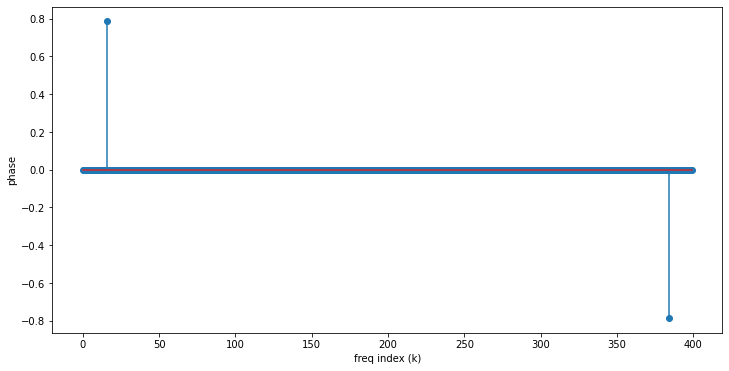

In [4]:
# fft and plots
dft = np.fft.fft(x1)
dft_mag = np.abs(dft)
dft_ph = np.angle(dft)
dft_ph[dft_mag < 0.0001] = 0  # set to zero all phase points where mag is negligible

#print(np.where(dft_mag > 500))
plt.stem(dft_mag)
plt.ylabel('mag')
plt.show()

plt.stem(dft_ph)
plt.ylabel('phase')
plt.xlabel('freq index (k)')
plt.show()

a) Describe the symmetry properties of the DFT magnitude and phase plots.  
b) How is the energy of the original signal distributed across the frequency bins in the magnitude plot?

Answer:

a) magnitude plot is symmetric (i.e., results are mirrored) at $k=N/2$; phase plot is antisymmetric (i.e., results are mirrored and reversed) at $k=N/2$

b) concentrated around two frequency bin peaks: at $k = 16$ and $k = 384$

c) What is the location, $k$, of the first peak of $\lvert X_1[k] \lvert$ from your plot?  
d) Calculate the frequency $f$ that corresponds to this value of $k$. Show your calculations in python below.

Answer:

c) $k=16$

d) $f(k) = 4$

In [5]:
# peak location
X1_k = fmp.find_peaks(dft_mag, thresh=0.1)[0]

# calcualte f associated with X1_k
f_k = X1_k * fs / len(x1)

print(f'X1_k={X1_k}, f={f_k}')

X1_k=16, f=4.0


## Exercise 3

Reproduce the following two signals, $x_{3a}$ and $x_{3b}$ by observing the given plots and creating the correct sinusoidal functions.  
For each signal, use a sampling rate of $F_s = 100$.  
[Hint: test that you got the signals right by plotting them and comparing to the given graphs below]
![](data/ex3a.png)
![](data/ex3b.png)



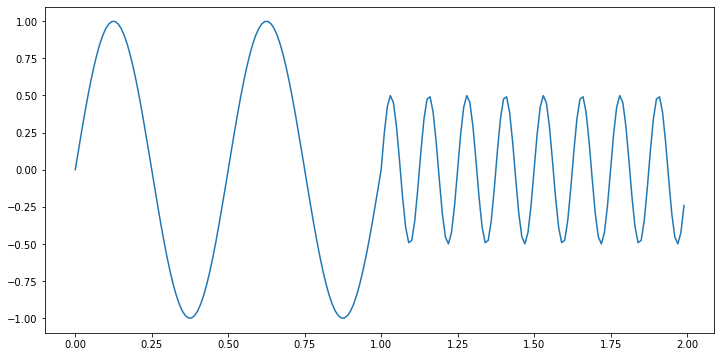

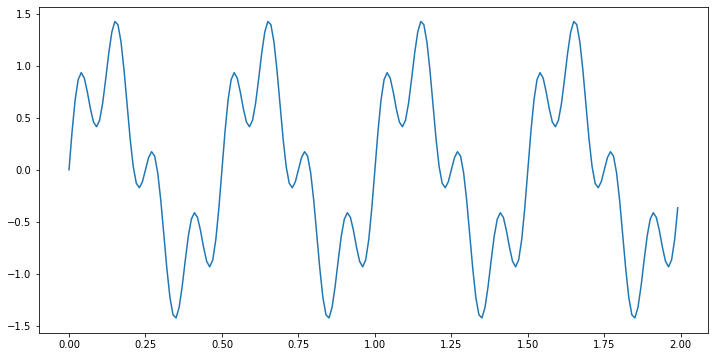

In [6]:
# unit 3 "fourier1" class notes
def make_cosine(a, k, ph, N) :
    n = np.arange(N)
    return a * np.cos( 2 * np.pi * k / N * n + ph)

def make_sine(a, k, ph, N) :
    n = np.arange(N)
    return a * np.sin( 2 * np.pi * k / N * n + ph)

t = 2
fs = 100
N = t * fs

# x3a
x3a = np.concatenate((make_sine(a=1, k=2, ph=0, N=int(N/2)),
                      make_sine(a=0.5, k=8, ph=0, N=int(N/2))))
x3a_t = np.arange(N) / fs
plt.plot(x3a_t, x3a)
plt.show()

# x3b
x3b = make_sine(a=1, k=4, ph=0, N=N) + make_sine(a=0.5, k=16, ph=0, N=N)
x3b_t = np.arange(N) / fs
plt.plot(x3b_t, x3b)
plt.show()

Now create and plot the magnitude of the DFT for signals $x_{3a}$ and $x_{3b}$. 

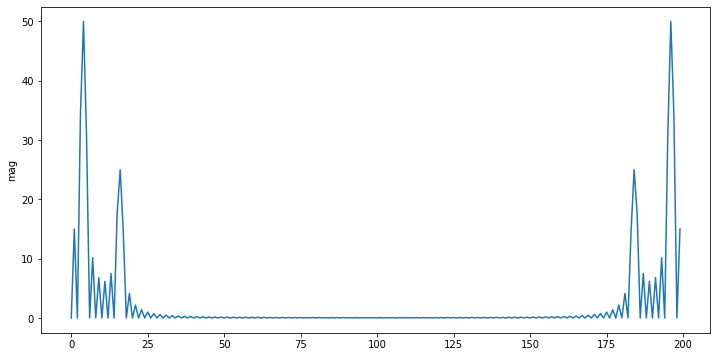

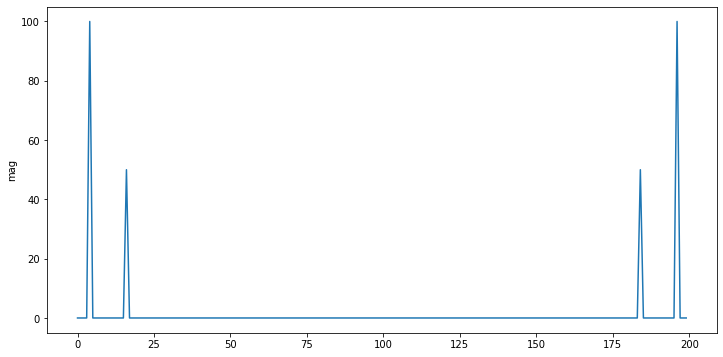

In [7]:
# fft and plots
xs = [x3a, x3b]

for x in xs:
    plt.plot(np.abs(np.fft.fft(x)))
    plt.ylabel('mag')
    plt.show()

Notice that one plot looks "clean" while the other has "spectral leakage". Why is this the case?

Answer:
x3a is made by "stitching" together two competing frequencies, introducing discontinuities and sharp transitions (e.g., the amplitude change at $t=1.0$). The DFT of x3a has more "leakage" because it has to use higher frequencies to represent those irregularities in the signal.

x3b is a much smoother signal, without any sharp transitions as it is the sum of two non-competing frequencies. So two frequency "probes" are enough for the DFT to represent it.

## Exercise 4

Note the following discrete-time functions $f_1, f_2, f_3$, and $g_1, g_2, g_3$.  
For each pair $f_n$ and $g_m$ (9 pairs total), compute the similarity measure between the two functions by using the dot product (i.e, summation of point-by-point-products): $\langle f,g\rangle = \sum_{n=0}^{15} f[n]g[n]$.
![](data/ex4a.png)
![](data/ex4b.png)


In [8]:
# print or calcuate the answers here
fs = [8*[1] + 8*[0],
      4*[1] + 4*[0] + 4*[1] + 4*[0],  
      2*[0] + 2*[1] + 4*[-1] + 4*[0] + 4*[1]]
gs = [8*[-1] + 8*[0],
      4*[0] + 4*[1] + 4*[0] + 4*[-1],
      2*[0] + 2*[1] + 4*[-1] + 4*[0] + 4*[1]]

# rows: f, cols: g
[[np.dot(f, g) for g in gs] for f in fs]

[[-8, 4, -2], [-4, 0, 2], [2, -8, 10]]

What does it mean when a similarity measurement is:  
a) highly positive?  
b) highly negative?  
c) zero or close to zero?  

Answer:

a) signals are similar (i.e., n-dimensional vectors point in the similar direction) and have energy (more than one dimension with non-zero magnitude)

b) signals are dissimilar (i.e., n-dimensional vectors point in opposing direction) and have energy (more than one dimension with non-zero magnitude)

c) at least one of the signals has regions with no energy (i.e., mag is close to zero for most of the n dimensions in at least one of the two n-dimensional vectors)

## Exercise 5

The plot below is zoomed in to show only the first 50 frequency bins of $\lvert X[k] \lvert$, the magnitude DFT of a signal $x[n]$ which was sampled from $x(t)$ (not shown). $x(t)$ is exactly 1.5 seconds long, and was sampled at a rate of $F_s = 400Hz$.  

![](data/ex5.png)

- What are the frequencies (in Hz) of the prominent sinusoidal components of $x(t)$?
- What are the amplitudes of these sinusoids?
- Is it possible to compute the phase of $x(t)$ from the given data? If so, what is the phase. If not, why not?

Show your calculations in python.



In [9]:
# answers:
k = [6, 18, 30]
m = [600, 1200, 300]
dft_mag = np.zeros(50)
for i in range(len(k)):
    dft_mag[k[i]] = m[i] 

def bin_to_freq(k):
    fs = 400
    N = 1.5 * fs
    return k * fs / N

def bin_to_amp(k):
    return 2 * dft_mag[k] / N

print(f'- freqs: {[bin_to_freq(x) for x in k]}')
print(f'- amps: {[bin_to_amp(x) for x in k]}')
print('- cannot compute the phase of x(t) without the DFT phase (we only have the DFT mag)')

- freqs: [4.0, 12.0, 20.0]
- amps: [6.0, 12.0, 3.0]
- cannot compute the phase of x(t) without the DFT phase (we only have the DFT mag)


## Exercise 6

For the signal $x_6[n]$ below, you will use 3 different ways to find the magnitude and phase of $X_6[k]$, the DFT of $x_6[n]$, at $k=12$. All three methods should produce the same results.

$N=256$ (the length of the $x_6[n]$). Run the code below to load $x_6$.

N = 256 k = 12


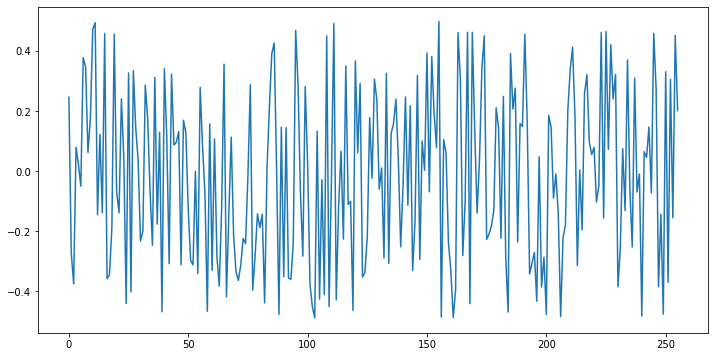

In [10]:
# load x[n]:
x6  = np.load('data/ex6.npy')
N = len(x6)
k = 12
print(f'N = {N} k = {k}')
plt.figure()
plt.plot(x6);

### Part 1

Create a sinusoid probe $s_{k,\phi}[n] = \cos(2\pi kn/N + \phi)$ with the proper $k$. Take the dot product (ie, find the similarity measure) between this sinusoid and the signal $x_6$. Repeat this process for a large number of different phases $\phi_t$ in the range $\phi_t \in [-\pi, \pi]$ to find the maximum value of $ \langle x_6, s_{k,\phi} \rangle  $. Note the maximum magnitude and phase that created it.

Use the phases array (below) as the phases to test.

In [11]:
# phase quantities to try:
test_phi = np.linspace(-np.pi, np.pi, 10000)

dots = [np.dot(make_cosine(1, k, ph, N), x6) for ph in test_phi]
idx = np.argmax(np.array(dots))
phi1 = test_phi[idx]
mag1 = dots[idx]
print(f'ph: {phi1}, mag: {mag1}')

ph: -0.2089368051442353, mag: 2.3116520950050403


### Part 2

For this part, use two sinusoid functions as probes:
- $s_{1k}[n] = \cos(2\pi kn/N)$
- $s_{2k}[n] = -\sin(2\pi kn/N)$  

Use the dot product as well as the identities discussed in Lecture to derive the magnitude and phase of the DFT from these results.

In [12]:
# complete the code here:
s1 = make_cosine(1, 12, 0, N)
s2 = -make_sine(1, 12, 0, N)
a1 = np.dot(s1, x6)
a2 = np.dot(s2, x6)

phi2 = np.arctan2(a2, a1)
mag2 = ((a1**2 + a2**2)**0.5)
print(f'ph: {phi2}, mag: {mag2}')

ph: -0.20912029251014497, mag: 2.311652133918941


### Part 3
Finally, take the DFT of the signal (using `np.fft.fft`) to find the magnitude and phase at the given frequency index $k$.

In [13]:
# complete the code here:
dft = np.fft.fft(x6)
dft_mag = np.abs(dft)
dft_ph = np.angle(dft)

phi3 = dft_ph[k]
mag3 = dft_mag[k]
print(f'ph: {phi3}, mag: {mag3}')

ph: -0.20912029251015418, mag: 2.311652133918937


## Exercise 7

Observe the following signal $x_7[n]$. It is a "chirp" signal, where the frequency increases throughout the duration of the signal.

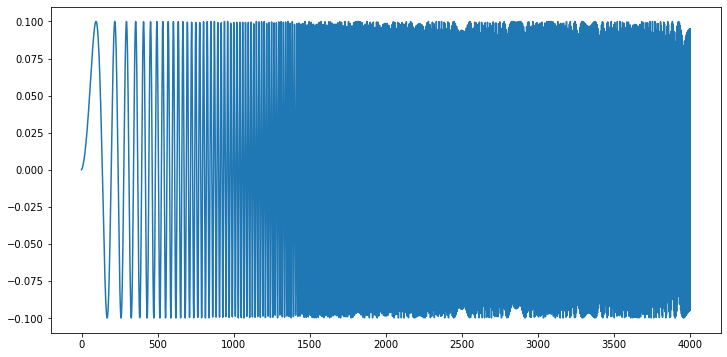

In [14]:
# load x_7[n]:
x7 = np.load('data/ex7.npy')

plt.figure()
plt.plot(x7);
ipd.Audio(x7, rate=8000, normalize=False)

We will now observe the effect of windowing this signal at different points in time with 2 different windows.

Use a centered _rectangular_ window of length $N = 512$ at 3 locations: $n = 600$, $n = 1200$, $n = 3000$. For each windowed signal, plot the magnitude DFT. You can use the function `np.fft.rfft`, which is optimized for real-valued inputs. This function will return an array of length $(1 + N/2)$, thereby removing the redundant information in the DFT.

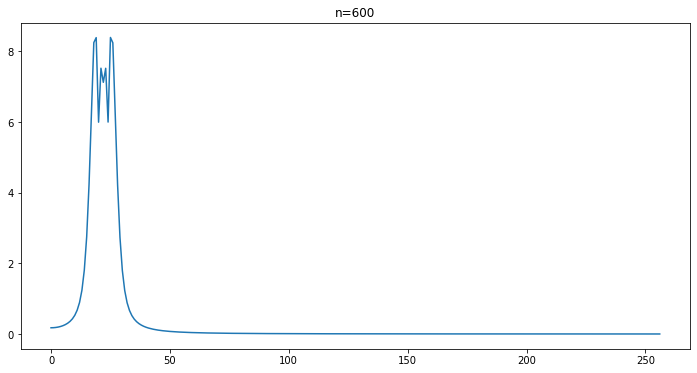

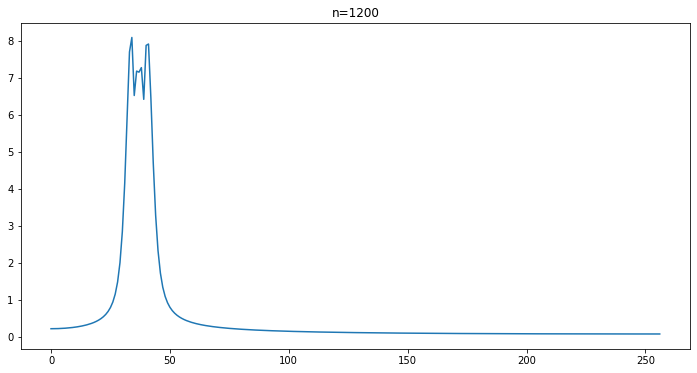

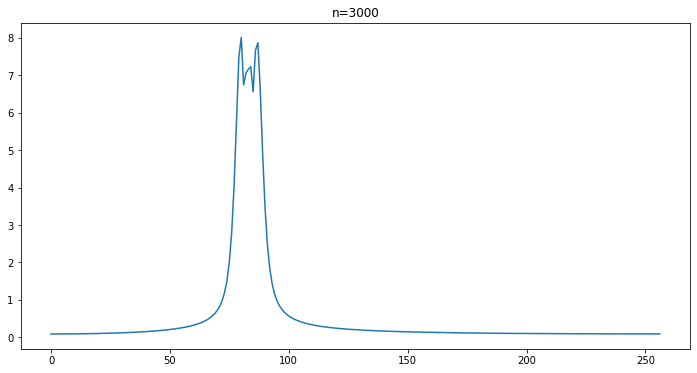

In [15]:
# plots of the DFT of rectangular windows of x7 at 3 locations:
win_len = 512
win = np.ones(win_len)

locs = [600, 1200, 3000]
for loc in locs:
    x_win = win * x7[loc:loc+win_len]
    dft = np.abs(np.fft.rfft(x_win))
    plt.plot(dft)
    plt.title(f'n={loc}')
    plt.show()

Now plot the magnitude DFT at the same locations using a _Hann_ window (`np.hanning`) instead of a rectangular window

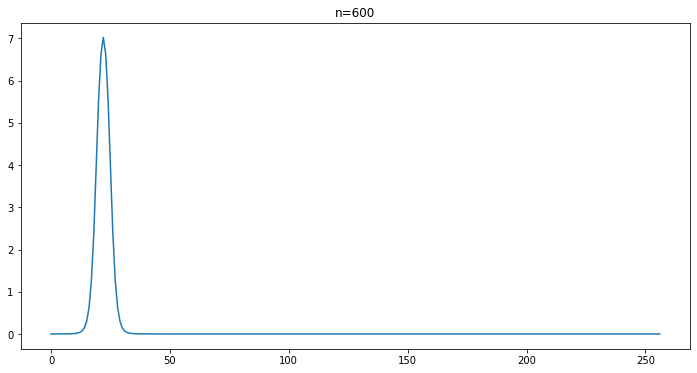

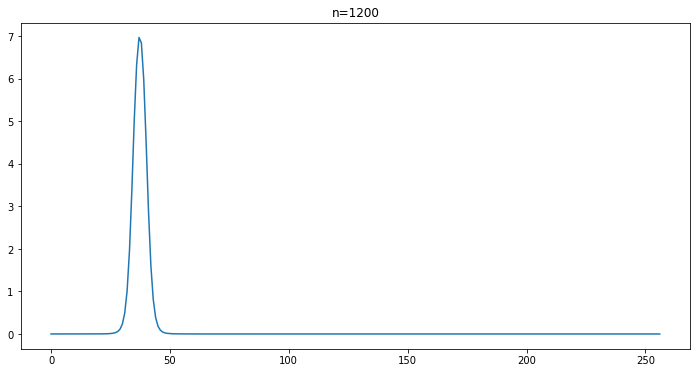

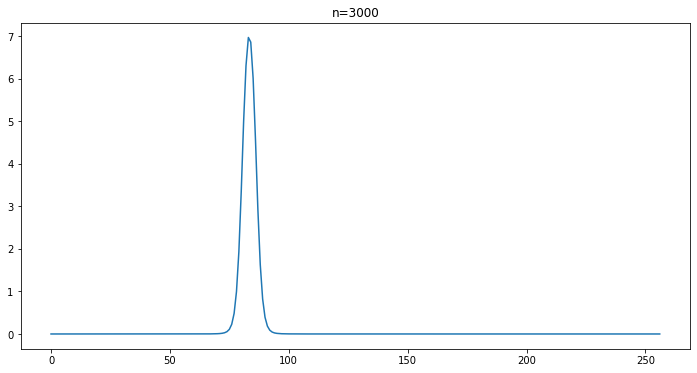

In [16]:
# plots of the DFT of hanning windows of x7 at 3 locations:
win_len = 512
win = np.hanning(win_len)

locs = [600, 1200, 3000]
for loc in locs:
    x_win = win * x7[loc:loc+win_len]
    dft = np.abs(np.fft.rfft(x_win))
    plt.plot(dft)
    plt.title(f'n={loc}')
    plt.show()

Describe your observations of these plots. What are the differences between the first set and the second set, and why is this happening?

Answer: the Hann window acts as a smoothing function to the original signal by de-emphasing the contribution of frequencies that are not at the center of the window, effectively reducing discontinuities. This in turn leads to the DFT requiring less amount of high frequencies than it otherwise needs when using a square window.

## Exercise 8

Consider a signal, 2 seconds long, whose Short Term Fourier Transform (STFT) is computed with the following parameter sets:  
1) $F_s = 22050, N = 1024, H = 256$  
2) $F_s = 48000, N = 1024, H = 512$  
3) $F_s = 8000, N = 2048, H = 1024$  

The windowing in this case is _non-centered_ (meaning, we don't zero-pad the beginning of the signal).

For each STFT above, determine:  
a) the frequency resolution of the STFT (in Hertz)  
b) the time resolution of the STFT (in seconds)   
c) the length (ie, the number of columns) of the STFT


In [17]:
# answer:
t = 2
args = [(22050, 1024, 256), (48000, 1024, 512), (8000, 2048, 1024)]

for i in range(len(args)):
    fs = args[i][0]
    N = args[i][1]
    H = args[i][2]
    print(f'{i+1}: a) {fs/float(N)} Hz, b) {H/float(fs)} secs, c) {int(N/float(H))}')

1: a) 21.533203125 Hz, b) 0.011609977324263039 secs, c) 4
2: a) 46.875 Hz, b) 0.010666666666666666 secs, c) 2
3: a) 3.90625 Hz, b) 0.128 secs, c) 2


## Exercise 9

Write the function `stft(x, fft_len, hop_size)`, which creates the Short Time Fourier Transform of `x`.  

Inputs:
- `x`: the sampled time-domain signal $x$
- `fft_len`: the length of the fft $N$
- `hop_size`: the hop size $H$

Output:
- `np.array`: a matrix of complex numbers of size `(num_bins, num_hops)`.

Implementation Notes:
- Use the Hann window for your STFT function (`np.hanning`).  
- Make the window a _centered window_ by zero-padding the beginning of $x$ appropriately.  
- You can use a python `for` loop to iterate over each hop.  
- Most of the time, the final window will be longer than the amount of signal you have left. Find a good way to deal with this case.
- Since the Fourier Transform of a real signal is symmetric, the STFT should return only the first half of the FT. In other words, `num_bins` should be $(1 + N/2)$.

In [18]:
# zero-pad to the right
def rpad(x, nzp):
    return np.pad(x, [(0, nzp - len(x))], mode='constant')

# zero-pad to the left
def lpad(x, nzp):
    return np.pad(x, [(nzp - len(x), 0)], mode='constant')

def stft(x, fft_len, hop_size): 
    # padding for centered window:
    x2 = lpad(x, len(x) + int(fft_len/2))
    M = int(np.ceil(len(x2) / hop_size))
    win = np.hanning(fft_len)
    m = []
    for i in range(M):
        # padding to account for last window
        x_win = rpad(x2[i*hop_size:i*hop_size+fft_len],fft_len) * win
        t_w = np.transpose([np.fft.rfft(x_win)])
        m.append(t_w)
    return np.hstack(m)

Test your function by loading a short piece of audio, creating the STFT, and plotting it. You can compare your results to `fmp.stft` to see how you did.

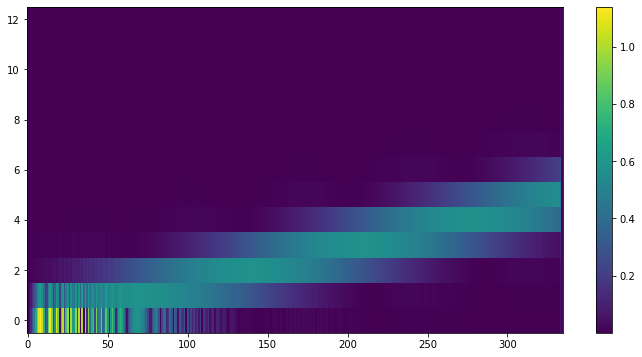

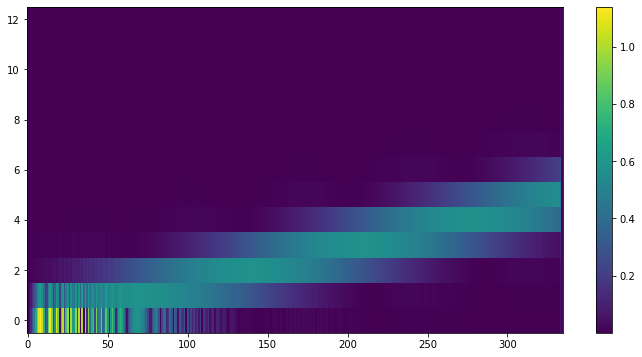

In [19]:
N = 24
H = 12
st1 = stft(x7, N, H)
st2 = fmp.stft(x7, N, H)

plt.figure()
plt.imshow(np.abs(st1), origin='lower', aspect='auto')
plt.colorbar();
plt.figure()
plt.imshow(np.abs(st2), origin='lower', aspect='auto')
plt.colorbar();

## Exercise 10

In your new role as _Inspector Spectrogram_, your job is to analyze mystery spectrograms and identify their parameters.

A new spectrogram arrived at your desk today, with a note reading:  
Beethoven's _Fur Elise_, played most beautifully at an average tempo of 110 BPM.

You find the [music to Fur Elise](images/fur_elise.jpg) and realize that a "beat" here means 1 eighth note (3 beats per bar). You then inspect the spectrogram's size (rows X columns) and have a pretty good guess that this spectrogram was created using a STFT that keeps only the first half (plus 1) of the spectra's bins.

Based only on the information you have been given, figure out the following:  

- $N$, the length of the FFT window used in creating the Spectrogram (i.e., `fft_len`). $N$ is some power of 2.
- $F_s$, the sample rate used in the audio recording. $F_s$ is a multiple of 1000.
- $H$, the hop size used to create Spectrogram (i.e., `hop_size`). $H$ is a power of 2.

Show all your work in detail, with the various plots and calculations that you used to figure out the three mystery values. Some of your answers will be approximations so you should round them to the most reasonable value.

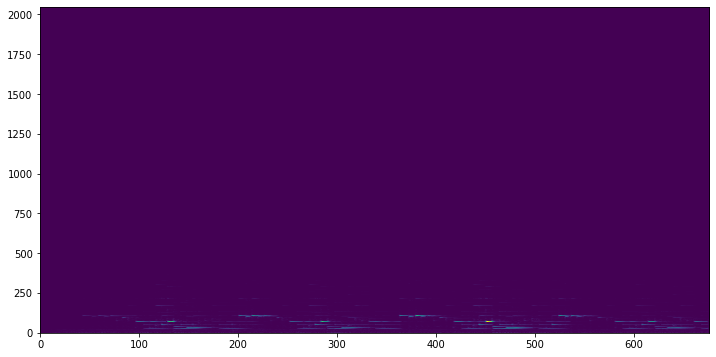

In [20]:
spec = np.load('data/ex10.npy')
plt.imshow(spec, origin='lower', aspect='auto');

"Hmmm...", you say to yourself. "This is hard to read. I'll have to enhance this plot somehow... and probably also find a way to zoom in on the details..."

In [21]:
# from unit 3 class notes (fourier 2)
@interact(g_idx=(0,4))
def spec_gamma(g_idx=1):
    gamma = (1,10,100,1000,10000)[g_idx]
    plt.figure(figsize=(16, 3))
    # zoomed in on the bin freqs with highest energy
    plt.imshow(np.log10(1 + spec * gamma)[:120:], origin='lower')
    #plt.colorbar()
    plt.title(f'$\gamma = {gamma}, k = [0,120)$')
    plt.show()

interactive(children=(IntSlider(value=1, description='g_idx', max=4), Output()), _dom_classes=('widget-interac…

In [22]:
# calculations to find N, the fft length used to create the STFT
k = spec.shape[0]
N = 2*k - 2  # (1 + N/2) bins

print(N)

4096


In [23]:
# calculations to find the original sampling rate of the audio, fs
k_E5 = 110  # visual inspection of zoomed spectogram + first note on first bar of sheet music
f_E5 = 659.25  # assuming concert A=440Hz and tuned piano
#f_E5 = 647  # if it's actually a bit flat; see next cell
fs = (f_E5 / k_E5) * N
print(fs)

24548.072727272727


In [24]:
# calculations to find hop_size
bars = 18  # visual inspection of zoomed spectrogram + sheet music, it looks like first 18 bars
bpm = 110
beat_secs = 60.0 / bpm
bar_secs = beat_secs * 3  # 3 beats per measure
t = bar_secs * bars

m = spec.shape[1]
secs_per_sample = t / m
Ff = 1 / secs_per_sample
hop_size = fs / Ff
        
print(f'approx. hop_size={hop_size}')

approx. hop_size=1068.0241122111404


Given that we know $H$ is actually a power of $2$, however, then it's more likely that $H = 1048$. This would be the case if E5 was played a bit flat (e.g., closer to 647 Hz), or if there were slightly less than the first 18 bars in the sample. Knowing that $F_s$ is a multiple of $1000$, and plugging $E5=647 Hz$, we'd get pretty close to $F_s=24000$.
